In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
from glob import glob

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

2022-11-24 04:21:30.989562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 04:21:31.141948: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-24 04:21:31.141974: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-24 04:21:31.910031: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7:

In [3]:
#now_path=os.getcwd()
now_path = "/root"
print(now_path)

/root


In [4]:
data = []
letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U"
          , "V", "W", "X", "Y", "Z", "zNothing", "zSpace"]

In [5]:
def add_dataset(X):
    data_dir = os.chdir(now_path+"/asl_dataset/"+X)
    #print(data_dir)
    data.append(glob('*.*'))
    print(X+":", len(data[-1]))

In [6]:
for letter in letters:
    add_dataset(letter)

A: 5996
B: 5996
C: 6000
D: 5996
E: 5996
F: 5996
G: 5996
H: 5996
I: 5996
J: 5996
K: 5996
L: 5996
M: 5996
N: 5996
O: 5996
P: 5996
Q: 5996
R: 5966
S: 5996
T: 5648
U: 4542
V: 5996
W: 5996
X: 5996
Y: 5720
Z: 5996
zNothing: 5996
zSpace: 5886


In [7]:
count=0
for i in range(len(data)):
    count+=len(data[i])
print("Total Number of data:",count)

Total Number of data: 165674


### 이미지 라벨 번호
A:0
B:1
C:2
D:3
E:4
F:5
G:6
H:7
I:8
J:9
K:10
L:11
M:12
N:13
O:14
P:15
Q:16
R:17
S:18
T:19
U:20
V:21
W:22
X:23
Y:24
Z:25
Nothing:26
Space:27

In [8]:
def getPath(x):
    return now_path+'/asl_dataset/'+x

/root/asl_dataset/A ['A2251.jpg']
/root/asl_dataset/B ['B2821.jpg']
/root/asl_dataset/C ['1980.jpg']
/root/asl_dataset/D ['D429.jpg']
/root/asl_dataset/E ['1980.jpg']
/root/asl_dataset/F ['F2587.jpg']
/root/asl_dataset/G ['1980.jpg']
/root/asl_dataset/H ['1980.jpg']
/root/asl_dataset/I ['I521.jpg']
/root/asl_dataset/J ['J1968.jpg']
/root/asl_dataset/K ['1980.jpg']
/root/asl_dataset/L ['1980.jpg']
/root/asl_dataset/M ['M2128.jpg']
/root/asl_dataset/N ['1980.jpg']
/root/asl_dataset/O ['1980.jpg']
/root/asl_dataset/P ['1980.jpg']
/root/asl_dataset/Q ['1980.jpg']
/root/asl_dataset/R ['1980.jpg']
/root/asl_dataset/S ['S225.jpg']
/root/asl_dataset/T ['1980.jpg']
/root/asl_dataset/U ['U1546.jpg']
/root/asl_dataset/V ['1980.jpg']
/root/asl_dataset/W ['W1266.jpg']
/root/asl_dataset/X ['X111.jpg']
/root/asl_dataset/Y ['Y947.jpg']
/root/asl_dataset/Z ['1980.jpg']
/root/asl_dataset/zNothing ['1980.jpg']
/root/asl_dataset/zSpace ['Space1629.jpg']


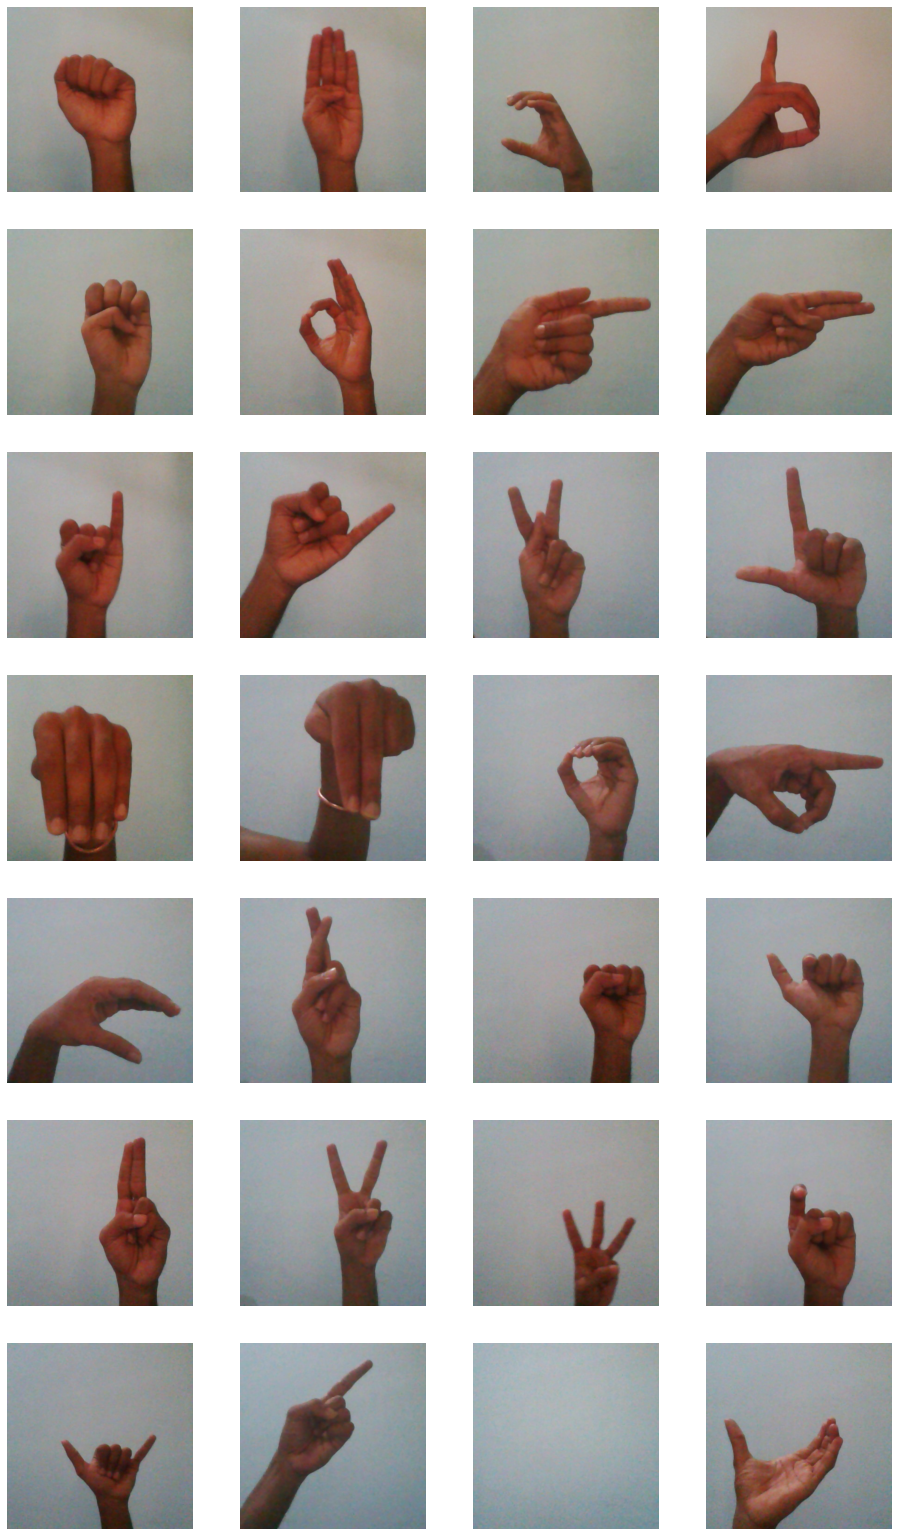

In [9]:
#각 라벨 별 데이터 한개씩 보기
nrows = 7
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 1

def nextPix(x):
  #print(data[letters.index(x)][pic_index-1:pic_index+2])
    print(getPath(x), data[letters.index(x)][pic_index-1:pic_index])
    return [os.path.join(getPath(x), fname) for fname in data[letters.index(x)][pic_index-1:pic_index]]
next_pix=[]
list_pix=[]

for letter in letters:
    next_pix.append(nextPix(letter))
    list_pix+=next_pix[letters.index(letter)]
    
for i, img_path in enumerate(list_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

#### 전처리
+ batch size 조정 가능!
+ target_size 조정 가능! 모델 돌리는데 너무 오래걸려서 100,100으로 하긴 했는데 180,180이나 240,240 정도로 해도 괜찮을듯(컴퓨터야 힘내..)

In [10]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=now_path+'/asl_dataset',
                                                 shuffle=True,
                                                 target_size=(240, 240), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=now_path+'/asl_dataset',
                                                 shuffle=True,
                                                 target_size=(240, 240), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 132545 images belonging to 28 classes.
Found 33129 images belonging to 28 classes.


In [11]:
train_dataset.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'zNothing': 26,
 'zSpace': 27}

In [12]:
X_train, y_train = train_dataset.next()
X_val, y_val = validation_dataset.next()

In [13]:
print("X_train shape:",X_train.shape,"& y_train shape:",y_train.shape)
print("X_val shape:",X_val.shape,"& y_val shape:",y_val.shape)

X_train shape: (32, 240, 240, 3) & y_train shape: (32, 28)
X_val shape: (32, 240, 240, 3) & y_val shape: (32, 28)


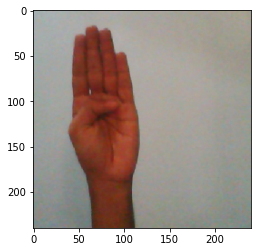

In [14]:
#전처리한 사진 미리보기(화질 체크)
plt.imshow(X_train[0])
plt.show()

#### 모델생성
+ 모델 어떤식으로 만들어야하는지는 틀만 짜놓은 겁니다!!(내용은 걍 블로그 복붙이라 신경 안써도 됨.. 지금은 먼가 이상해요 ㅎ)
+ 근데 데이터 크기 미쳐서 무조건 학교서버로 돌려야 할 각^^,,,,ㅠㅠㅠㅠㅠ

In [15]:
import tensorflow as tf

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='sigmoid')#마지막에 classification 문제니깐 softmax..여야하는거일듯?? 일단 복붙으로 넣어서 sigmoid로 되엇어유..
])
model.summary() # 신경망의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

2022-11-24 04:21:45.315144: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-24 04:21:45.315255: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-24 04:21:45.315306: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-24 04:21:45.315354: W tensorflow/compiler/xla/stream_executor/platform/defa

In [17]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [18]:
# 모델 훈련
history = model.fit(train_dataset, # train_dataset안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_dataset, # validatino_dataset안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 32번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_dataset를 32번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

Epoch 1/100
4/4 - 4s - loss: 3.9352 - accuracy: 0.0234 - val_loss: 3.3271 - val_accuracy: 0.0703 - 4s/epoch - 1s/step
Epoch 2/100
4/4 - 3s - loss: 3.3510 - accuracy: 0.0469 - val_loss: 3.3409 - val_accuracy: 0.0234 - 3s/epoch - 696ms/step
Epoch 3/100
4/4 - 3s - loss: 3.3889 - accuracy: 0.0312 - val_loss: 3.3172 - val_accuracy: 0.0156 - 3s/epoch - 794ms/step
Epoch 4/100
4/4 - 3s - loss: 3.2861 - accuracy: 0.0625 - val_loss: 3.3038 - val_accuracy: 0.0312 - 3s/epoch - 748ms/step
Epoch 5/100
4/4 - 3s - loss: 3.2693 - accuracy: 0.0469 - val_loss: 3.2260 - val_accuracy: 0.0703 - 3s/epoch - 727ms/step
Epoch 6/100
4/4 - 3s - loss: 3.2364 - accuracy: 0.0703 - val_loss: 3.1837 - val_accuracy: 0.0859 - 3s/epoch - 790ms/step
Epoch 7/100
4/4 - 3s - loss: 3.1708 - accuracy: 0.1094 - val_loss: 3.1800 - val_accuracy: 0.1328 - 3s/epoch - 706ms/step
Epoch 8/100
4/4 - 3s - loss: 3.0623 - accuracy: 0.1797 - val_loss: 2.8924 - val_accuracy: 0.1875 - 3s/epoch - 790ms/step
Epoch 9/100
4/4 - 3s - loss: 2.9549

In [19]:
# 모델 성능 평가
model.evaluate(train_dataset)

4143/4143 [==============================] - 413s 100ms/step - loss: 0.5039 - accuracy: 0.8360


[0.5038572549819946, 0.8360028862953186]

In [20]:
model.evaluate(validation_dataset)

1036/1036 [==============================] - 106s 102ms/step - loss: 1.1419 - accuracy: 0.6479


[1.1418818235397339, 0.6478613615036011]

In [21]:
model_softmax = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')#마지막에 classification 문제니깐 softmax..여야하는거일듯?? 일단 복붙으로 넣어서 sigmoid로 되엇어유..
])
model.summary() # 신경망의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [22]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model_softmax.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [23]:
# 모델 훈련
history_softmax = model_softmax.fit(train_dataset, # train_dataset안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_dataset, # validatino_dataset안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 32번 부르겠다
                              epochs=200, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_dataset를 32번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

Epoch 1/200
4/4 - 4s - loss: 3.4678 - accuracy: 0.0234 - val_loss: 3.3508 - val_accuracy: 0.0703 - 4s/epoch - 983ms/step
Epoch 2/200
4/4 - 3s - loss: 3.3332 - accuracy: 0.0469 - val_loss: 3.3140 - val_accuracy: 0.0391 - 3s/epoch - 693ms/step
Epoch 3/200
4/4 - 3s - loss: 3.2938 - accuracy: 0.0859 - val_loss: 3.2449 - val_accuracy: 0.0938 - 3s/epoch - 723ms/step
Epoch 4/200
4/4 - 3s - loss: 3.2729 - accuracy: 0.0781 - val_loss: 3.2982 - val_accuracy: 0.0547 - 3s/epoch - 686ms/step
Epoch 5/200
4/4 - 3s - loss: 3.2104 - accuracy: 0.1016 - val_loss: 3.1625 - val_accuracy: 0.1094 - 3s/epoch - 713ms/step
Epoch 6/200
4/4 - 3s - loss: 3.0979 - accuracy: 0.0859 - val_loss: 3.0171 - val_accuracy: 0.1094 - 3s/epoch - 702ms/step
Epoch 7/200
4/4 - 3s - loss: 2.9254 - accuracy: 0.1562 - val_loss: 3.0031 - val_accuracy: 0.1797 - 3s/epoch - 709ms/step
Epoch 8/200
4/4 - 3s - loss: 2.8454 - accuracy: 0.1875 - val_loss: 2.7194 - val_accuracy: 0.2969 - 3s/epoch - 696ms/step
Epoch 9/200
4/4 - 3s - loss: 2.7

In [24]:
# 모델 성능 평가
model_softmax.evaluate(train_dataset)

4143/4143 [==============================] - 413s 100ms/step - loss: 0.0942 - accuracy: 0.9705


[0.09422213584184647, 0.9704779386520386]

In [25]:
model_softmax.evaluate(validation_dataset)

1036/1036 [==============================] - 106s 102ms/step - loss: 0.3763 - accuracy: 0.8886


[0.3763469159603119, 0.8886474370956421]

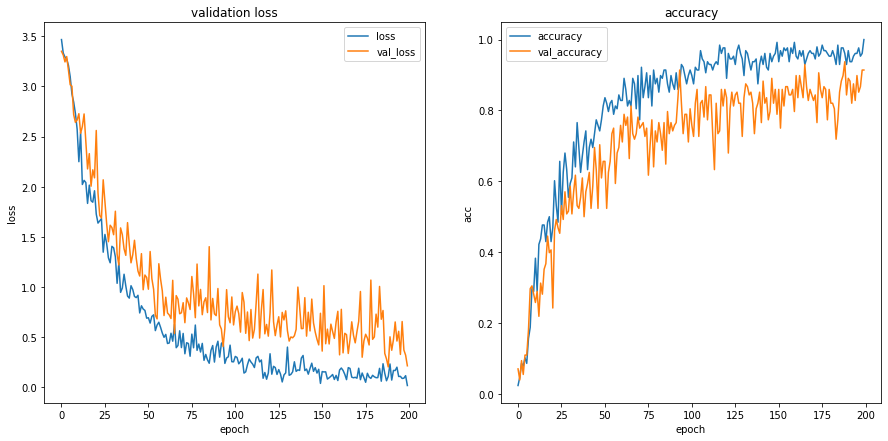

In [26]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.title('validation loss')
plt.plot(history_softmax.history['loss'], label = 'loss')
plt.plot(history_softmax.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('accuracy')
plt.plot(history_softmax.history['accuracy'], label = 'accuracy')
plt.plot(history_softmax.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

In [27]:
print(history_softmax.history)

{'loss': [3.4677963256835938, 3.333186626434326, 3.293811321258545, 3.272944211959839, 3.2104015350341797, 3.0979104042053223, 2.925377368927002, 2.845398187637329, 2.731955051422119, 2.5743966102600098, 2.2493364810943604, 2.543872833251953, 2.021895408630371, 2.0630850791931152, 2.041254758834839, 1.833126425743103, 2.015561103820801, 1.860224962234497, 1.8449420928955078, 1.959259271621704, 1.7266775369644165, 1.6367037296295166, 1.6582449674606323, 1.6813805103302002, 1.346465826034546, 1.5233774185180664, 1.4320365190505981, 1.2894792556762695, 1.2405731678009033, 1.4048134088516235, 1.3899383544921875, 1.2996646165847778, 1.0356501340866089, 1.2406232357025146, 0.9455147981643677, 0.9891442060470581, 1.1264400482177734, 1.0095634460449219, 0.908754289150238, 0.888157069683075, 1.0118588209152222, 0.9738261699676514, 0.9046182632446289, 0.8932539820671082, 0.9163526296615601, 0.740201473236084, 0.8115431070327759, 0.779382586479187, 0.7652496099472046, 0.6880664229393005, 0.692343

In [28]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')#마지막에 classification 문제니깐 softmax..여야하는거일듯?? 일단 복붙으로 넣어서 sigmoid로 되엇어유..
])
model_3.summary() # 신경망의 구조 확인

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 119, 119, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 32)      

In [29]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model_3.compile(optimizer=Adam(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [30]:
history_3 = model_3.fit(train_dataset, # train_dataset안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_dataset, # validatino_dataset안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 32번 부르겠다
                              epochs=200, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_dataset를 32번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

Epoch 1/200
4/4 - 4s - loss: 50.2228 - acc: 0.0469 - val_loss: 4.6000 - val_acc: 0.0156 - 4s/epoch - 1s/step
Epoch 2/200
4/4 - 3s - loss: 3.9571 - acc: 0.0156 - val_loss: 3.3528 - val_acc: 0.0312 - 3s/epoch - 676ms/step
Epoch 3/200
4/4 - 3s - loss: 3.3472 - acc: 0.0547 - val_loss: 3.3338 - val_acc: 0.0312 - 3s/epoch - 694ms/step
Epoch 4/200
4/4 - 3s - loss: 3.3339 - acc: 0.0703 - val_loss: 3.3422 - val_acc: 0.0312 - 3s/epoch - 718ms/step
Epoch 5/200
4/4 - 3s - loss: 3.3345 - acc: 0.0234 - val_loss: 3.3373 - val_acc: 0.0156 - 3s/epoch - 680ms/step
Epoch 6/200
4/4 - 3s - loss: 3.3417 - acc: 0.0234 - val_loss: 3.3428 - val_acc: 0.0234 - 3s/epoch - 674ms/step
Epoch 7/200
4/4 - 3s - loss: 3.3294 - acc: 0.0234 - val_loss: 3.3394 - val_acc: 0.0156 - 3s/epoch - 706ms/step
Epoch 8/200
4/4 - 3s - loss: 3.3341 - acc: 0.0234 - val_loss: 3.3359 - val_acc: 0.0312 - 3s/epoch - 674ms/step
Epoch 9/200
4/4 - 3s - loss: 3.3339 - acc: 0.0391 - val_loss: 3.3218 - val_acc: 0.0312 - 3s/epoch - 697ms/step
Epo

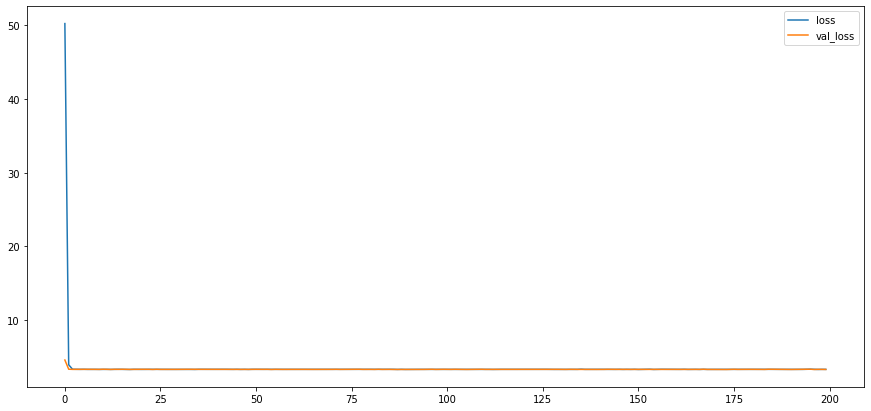

In [31]:
plt.figure(figsize=(15,7))
plt.plot(history_3.history['loss'],label='loss')
plt.plot(history_3.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [32]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')#마지막에 classification 문제니깐 softmax..여야하는거일듯?? 일단 복붙으로 넣어서 sigmoid로 되엇어유..
])
model_4.summary() # 신경망의 구조 확인

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 119, 119, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 28, 32)      

In [33]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model_4.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [34]:
history_4 = model_4.fit(train_dataset, # train_dataset안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_dataset, # validatino_dataset안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 32번 부르겠다
                              epochs=200, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_dataset를 32번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

Epoch 1/200
4/4 - 4s - loss: 3.3991 - acc: 0.0156 - val_loss: 3.3341 - val_acc: 0.0312 - 4s/epoch - 980ms/step
Epoch 2/200
4/4 - 3s - loss: 3.3469 - acc: 0.0625 - val_loss: 3.3045 - val_acc: 0.0547 - 3s/epoch - 708ms/step
Epoch 3/200
4/4 - 3s - loss: 3.3180 - acc: 0.0469 - val_loss: 3.2846 - val_acc: 0.0781 - 3s/epoch - 729ms/step
Epoch 4/200
4/4 - 3s - loss: 3.2394 - acc: 0.1016 - val_loss: 3.2066 - val_acc: 0.0859 - 3s/epoch - 687ms/step
Epoch 5/200
4/4 - 3s - loss: 3.2053 - acc: 0.0781 - val_loss: 3.1438 - val_acc: 0.0938 - 3s/epoch - 686ms/step
Epoch 6/200
4/4 - 3s - loss: 2.9504 - acc: 0.1797 - val_loss: 3.1951 - val_acc: 0.1328 - 3s/epoch - 690ms/step
Epoch 7/200
4/4 - 3s - loss: 3.0593 - acc: 0.2031 - val_loss: 2.9530 - val_acc: 0.2500 - 3s/epoch - 678ms/step
Epoch 8/200
4/4 - 3s - loss: 2.7151 - acc: 0.2734 - val_loss: 2.8024 - val_acc: 0.2109 - 3s/epoch - 685ms/step
Epoch 9/200
4/4 - 3s - loss: 2.6483 - acc: 0.2422 - val_loss: 2.6785 - val_acc: 0.3203 - 3s/epoch - 716ms/step
E

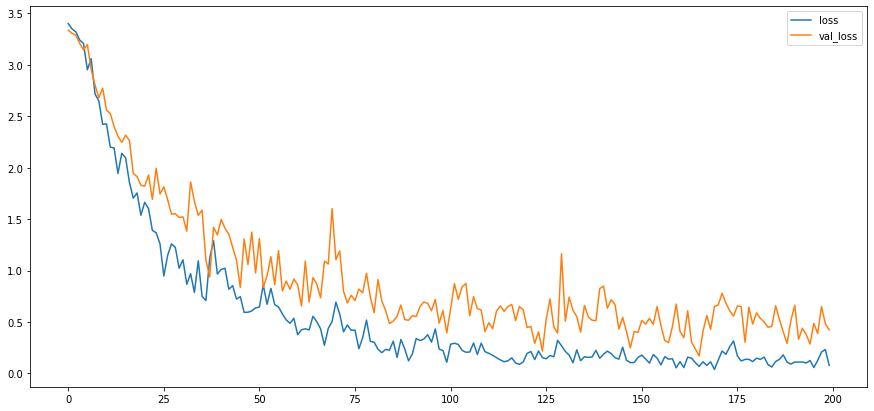

In [35]:
plt.figure(figsize=(15,7))
plt.plot(history_4.history['loss'],label='loss')
plt.plot(history_4.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

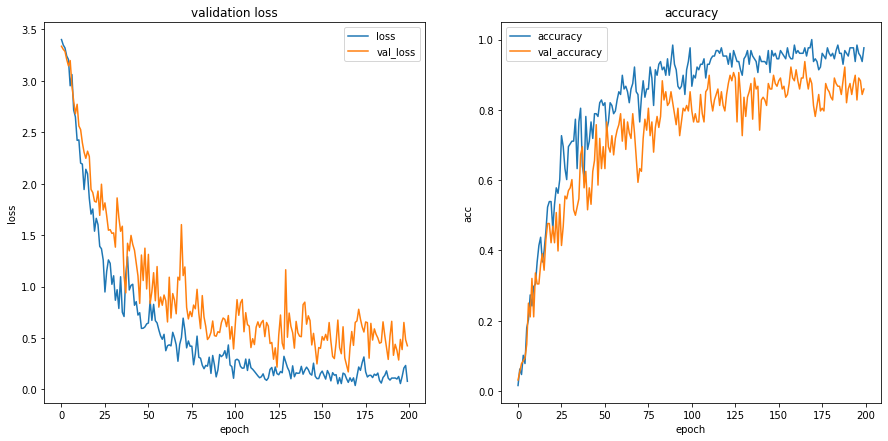

In [36]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.title('validation loss')
plt.plot(history_4.history['loss'], label = 'loss')
plt.plot(history_4.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('accuracy')
plt.plot(history_4.history['acc'], label = 'accuracy')
plt.plot(history_4.history['val_acc'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

In [37]:
model_adam_modified = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')#마지막에 classification 문제니깐 softmax..여야하는거일듯?? 일단 복붙으로 넣어서 sigmoid로 되엇어유..
])
model_adam_modified.summary() # 신경망의 구조 확인

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 119, 119, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 28, 32)      

In [38]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model_adam_modified.compile(optimizer=Adam(learning_rate=0.005),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [39]:
history_adam_modified = model_adam_modified.fit(train_dataset, # train_dataset안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_dataset, # validatino_dataset안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 32번 부르겠다
                              epochs=200, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_dataset를 32번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

Epoch 1/200
4/4 - 4s - loss: 16.0198 - acc: 0.0156 - val_loss: 3.5354 - val_acc: 0.0469 - 4s/epoch - 913ms/step
Epoch 2/200
4/4 - 3s - loss: 3.6187 - acc: 0.0312 - val_loss: 3.4065 - val_acc: 0.0469 - 3s/epoch - 705ms/step
Epoch 3/200
4/4 - 3s - loss: 3.3545 - acc: 0.0391 - val_loss: 3.3328 - val_acc: 0.0391 - 3s/epoch - 720ms/step
Epoch 4/200
4/4 - 3s - loss: 3.3413 - acc: 0.0078 - val_loss: 3.3319 - val_acc: 0.0391 - 3s/epoch - 707ms/step
Epoch 5/200
4/4 - 3s - loss: 3.3270 - acc: 0.0391 - val_loss: 3.3261 - val_acc: 0.0469 - 3s/epoch - 676ms/step
Epoch 6/200
4/4 - 3s - loss: 3.4297 - acc: 0.0859 - val_loss: 3.3339 - val_acc: 0.0312 - 3s/epoch - 684ms/step
Epoch 7/200
4/4 - 3s - loss: 3.3341 - acc: 0.0391 - val_loss: 3.3310 - val_acc: 0.0859 - 3s/epoch - 717ms/step
Epoch 8/200
4/4 - 3s - loss: 3.3322 - acc: 0.0156 - val_loss: 3.3324 - val_acc: 0.0234 - 3s/epoch - 715ms/step
Epoch 9/200
4/4 - 3s - loss: 3.3289 - acc: 0.0625 - val_loss: 3.3309 - val_acc: 0.0078 - 3s/epoch - 703ms/step


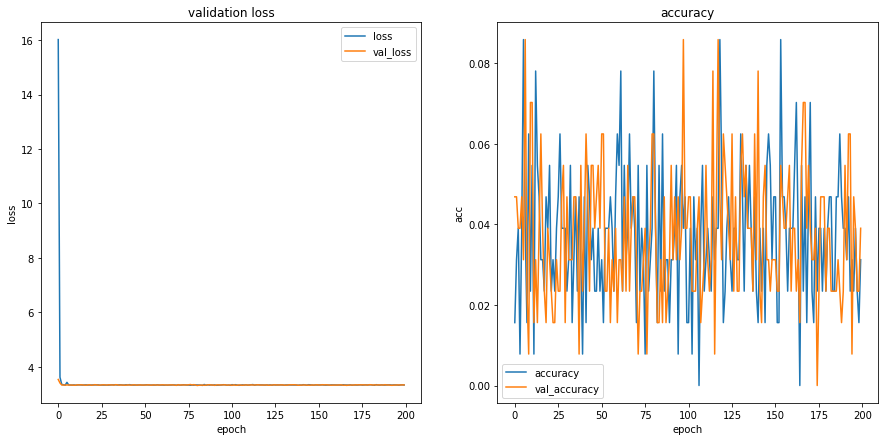

In [40]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.title('validation loss')
plt.plot(history_adam_modified.history['loss'], label = 'loss')
plt.plot(history_adam_modified.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('accuracy')
plt.plot(history_adam_modified.history['acc'], label = 'accuracy')
plt.plot(history_adam_modified.history['val_acc'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

In [41]:
model_600 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')#마지막에 classification 문제니깐 softmax..여야하는거일듯?? 일단 복붙으로 넣어서 sigmoid로 되엇어유..
])
model_600.summary() # 신경망의 구조 확인

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 119, 119, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 28, 28, 32)      

In [42]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model_600.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [43]:
history_600 = model_600.fit(train_dataset, # train_dataset안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_dataset, # validatino_dataset안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 32번 부르겠다
                              epochs=600, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_dataset를 32번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

Epoch 1/600
4/4 - 4s - loss: 3.6345 - acc: 0.0469 - val_loss: 3.4796 - val_acc: 0.0312 - 4s/epoch - 956ms/step
Epoch 2/600
4/4 - 3s - loss: 3.4058 - acc: 0.0234 - val_loss: 3.3093 - val_acc: 0.0312 - 3s/epoch - 735ms/step
Epoch 3/600
4/4 - 3s - loss: 3.3310 - acc: 0.0391 - val_loss: 3.3337 - val_acc: 0.0469 - 3s/epoch - 700ms/step
Epoch 4/600
4/4 - 3s - loss: 3.2910 - acc: 0.0781 - val_loss: 3.2265 - val_acc: 0.0859 - 3s/epoch - 698ms/step
Epoch 5/600
4/4 - 3s - loss: 3.2825 - acc: 0.0625 - val_loss: 3.2341 - val_acc: 0.0547 - 3s/epoch - 700ms/step
Epoch 6/600
4/4 - 3s - loss: 3.0624 - acc: 0.1719 - val_loss: 3.1362 - val_acc: 0.1094 - 3s/epoch - 678ms/step
Epoch 7/600
4/4 - 3s - loss: 2.9744 - acc: 0.2031 - val_loss: 2.7881 - val_acc: 0.1719 - 3s/epoch - 708ms/step
Epoch 8/600
4/4 - 3s - loss: 2.8404 - acc: 0.1719 - val_loss: 2.9051 - val_acc: 0.1797 - 3s/epoch - 683ms/step
Epoch 9/600
4/4 - 3s - loss: 2.6017 - acc: 0.2969 - val_loss: 2.9169 - val_acc: 0.2188 - 3s/epoch - 712ms/step
E

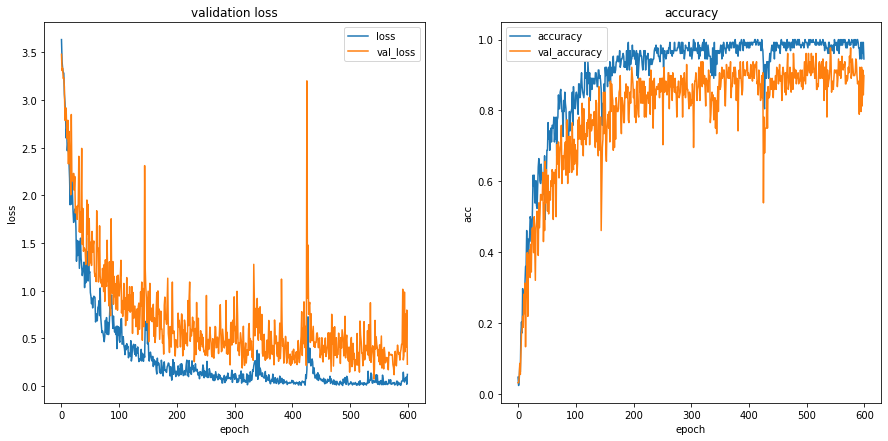

In [44]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.title('validation loss')
plt.plot(history_600.history['loss'], label = 'loss')
plt.plot(history_600.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('accuracy')
plt.plot(history_600.history['acc'], label = 'accuracy')
plt.plot(history_600.history['val_acc'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

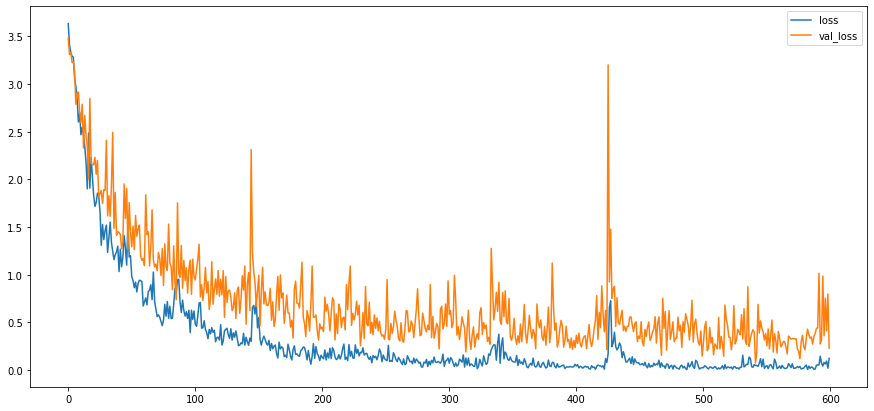

In [45]:
plt.figure(figsize=(15,7))
plt.plot(history_600.history['loss'],label='loss')
plt.plot(history_600.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [46]:
model_600_lr_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')#마지막에 classification 문제니깐 softmax..여야하는거일듯?? 일단 복붙으로 넣어서 sigmoid로 되엇어유..
])
model_600_lr_5.summary() # 신경망의 구조 확인

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 119, 119, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 28, 28, 32)      

In [49]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model_600_lr_5.compile(optimizer=Adam(learning_rate=0.005),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [50]:
history_600_lr_5 = model_600_lr_5.fit(train_dataset, # train_dataset안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_dataset, # validatino_dataset안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 32번 부르겠다
                              epochs=600, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_dataset를 32번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

Epoch 1/600
4/4 - 5s - loss: 3.3377 - acc: 0.0547 - val_loss: 3.3334 - val_acc: 0.0547 - 5s/epoch - 1s/step
Epoch 2/600
4/4 - 4s - loss: 3.3261 - acc: 0.0312 - val_loss: 3.3365 - val_acc: 0.0312 - 4s/epoch - 1s/step
Epoch 3/600
4/4 - 4s - loss: 3.3417 - acc: 0.0312 - val_loss: 3.3263 - val_acc: 0.0469 - 4s/epoch - 958ms/step
Epoch 4/600
4/4 - 4s - loss: 3.3317 - acc: 0.0234 - val_loss: 3.3266 - val_acc: 0.0391 - 4s/epoch - 978ms/step
Epoch 5/600
4/4 - 4s - loss: 3.3283 - acc: 0.0703 - val_loss: 3.3235 - val_acc: 0.0625 - 4s/epoch - 965ms/step
Epoch 6/600
4/4 - 4s - loss: 3.3334 - acc: 0.0312 - val_loss: 3.3351 - val_acc: 0.0312 - 4s/epoch - 981ms/step
Epoch 7/600
4/4 - 4s - loss: 3.3284 - acc: 0.0391 - val_loss: 3.3297 - val_acc: 0.0312 - 4s/epoch - 1s/step
Epoch 8/600
4/4 - 4s - loss: 3.3318 - acc: 0.0234 - val_loss: 3.3194 - val_acc: 0.0547 - 4s/epoch - 955ms/step
Epoch 9/600
4/4 - 4s - loss: 3.3440 - acc: 0.0391 - val_loss: 3.3221 - val_acc: 0.0312 - 4s/epoch - 952ms/step
Epoch 10/6

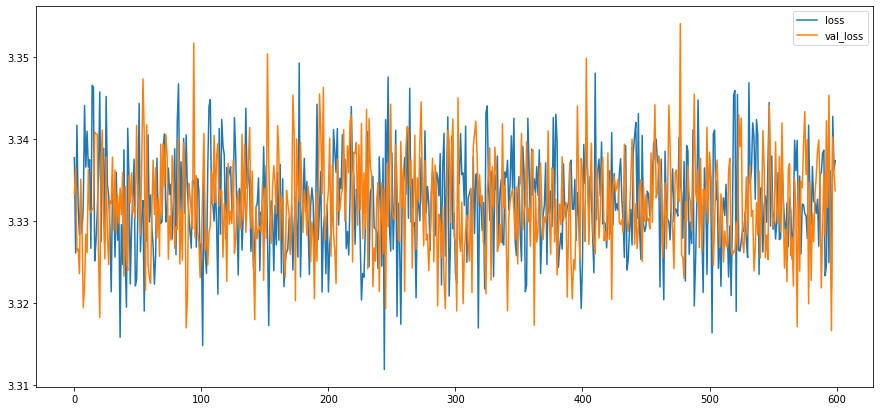

In [51]:
plt.figure(figsize=(15,7))
plt.plot(history_600_lr_5.history['loss'],label='loss')
plt.plot(history_600_lr_5.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [52]:
model_600_lr_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')#마지막에 classification 문제니깐 softmax..여야하는거일듯?? 일단 복붙으로 넣어서 sigmoid로 되엇어유..
])
model_600_lr_3.summary() # 신경망의 구조 확인

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 119, 119, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 28, 28, 32)      

In [53]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model_600_lr_3.compile(optimizer=Adam(learning_rate=0.003),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [55]:
history_600_lr_3 = model_600_lr_3.fit(train_dataset, # train_dataset안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_dataset, # validatino_dataset안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 32번 부르겠다
                              epochs=600, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_dataset를 32번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

Epoch 1/600
4/4 - 4s - loss: 4.3985 - acc: 0.0469 - val_loss: 3.3158 - val_acc: 0.0547 - 4s/epoch - 978ms/step
Epoch 2/600
4/4 - 3s - loss: 3.3417 - acc: 0.0469 - val_loss: 3.3331 - val_acc: 0.0156 - 3s/epoch - 685ms/step
Epoch 3/600
4/4 - 3s - loss: 3.3388 - acc: 0.0156 - val_loss: 3.3348 - val_acc: 0.0078 - 3s/epoch - 750ms/step
Epoch 4/600
4/4 - 3s - loss: 3.3371 - acc: 0.0469 - val_loss: 3.3238 - val_acc: 0.0234 - 3s/epoch - 702ms/step
Epoch 5/600
4/4 - 3s - loss: 3.3207 - acc: 0.0469 - val_loss: 3.3091 - val_acc: 0.0234 - 3s/epoch - 672ms/step
Epoch 6/600
4/4 - 3s - loss: 3.2951 - acc: 0.0391 - val_loss: 3.2757 - val_acc: 0.1562 - 3s/epoch - 677ms/step
Epoch 7/600
4/4 - 3s - loss: 3.2309 - acc: 0.1250 - val_loss: 3.0957 - val_acc: 0.1172 - 3s/epoch - 655ms/step
Epoch 8/600
4/4 - 3s - loss: 3.0638 - acc: 0.1406 - val_loss: 3.0896 - val_acc: 0.1406 - 3s/epoch - 685ms/step
Epoch 9/600
4/4 - 3s - loss: 2.9414 - acc: 0.1406 - val_loss: 2.8619 - val_acc: 0.1641 - 3s/epoch - 702ms/step
E

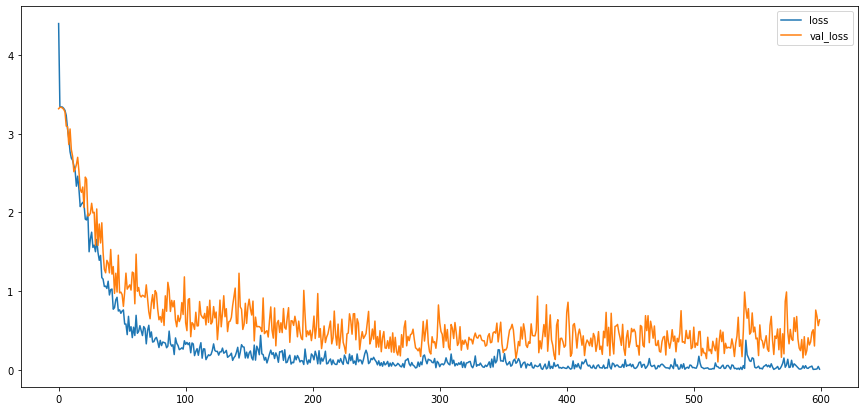

In [56]:
plt.figure(figsize=(15,7))
plt.plot(history_600_lr_3.history['loss'],label='loss')
plt.plot(history_600_lr_3.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [57]:
model_600_lr_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')#마지막에 classification 문제니깐 softmax..여야하는거일듯?? 일단 복붙으로 넣어서 sigmoid로 되엇어유..
])
model_600_lr_4.summary() # 신경망의 구조 확인

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 119, 119, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 28, 28, 32)      

In [58]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model_600_lr_4.compile(optimizer=Adam(learning_rate=0.004),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [59]:
history_600_lr_4 = model_600_lr_4.fit(train_dataset, # train_dataset안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_dataset, # validatino_dataset안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 32번 부르겠다
                              epochs=600, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_dataset를 32번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

Epoch 1/600
4/4 - 4s - loss: 15.9148 - acc: 0.0391 - val_loss: 3.4037 - val_acc: 0.0391 - 4s/epoch - 972ms/step
Epoch 2/600
4/4 - 3s - loss: 3.3403 - acc: 0.0156 - val_loss: 3.3326 - val_acc: 0.0312 - 3s/epoch - 691ms/step
Epoch 3/600
4/4 - 3s - loss: 3.3371 - acc: 0.0391 - val_loss: 3.3291 - val_acc: 0.0312 - 3s/epoch - 662ms/step
Epoch 4/600
4/4 - 3s - loss: 3.3293 - acc: 0.0625 - val_loss: 3.3274 - val_acc: 0.0469 - 3s/epoch - 701ms/step
Epoch 5/600
4/4 - 3s - loss: 3.3310 - acc: 0.0391 - val_loss: 3.3310 - val_acc: 0.0078 - 3s/epoch - 676ms/step
Epoch 6/600
4/4 - 3s - loss: 3.3267 - acc: 0.0625 - val_loss: 3.3218 - val_acc: 0.0547 - 3s/epoch - 664ms/step
Epoch 7/600
4/4 - 3s - loss: 3.3204 - acc: 0.0625 - val_loss: 3.2932 - val_acc: 0.0469 - 3s/epoch - 671ms/step
Epoch 8/600
4/4 - 3s - loss: 3.2938 - acc: 0.1016 - val_loss: 3.2891 - val_acc: 0.0938 - 3s/epoch - 648ms/step
Epoch 9/600
4/4 - 3s - loss: 3.2299 - acc: 0.0547 - val_loss: 3.1549 - val_acc: 0.1406 - 3s/epoch - 665ms/step


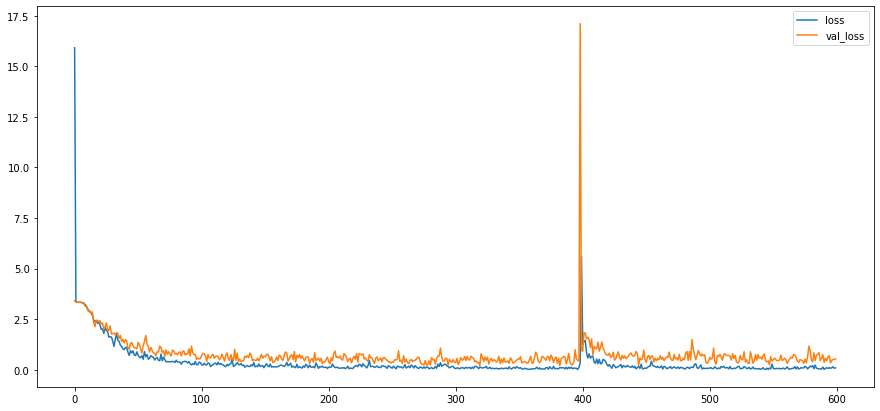

In [60]:
plt.figure(figsize=(15,7))
plt.plot(history_600_lr_4.history['loss'],label='loss')
plt.plot(history_600_lr_4.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [62]:
# 모델 성능 평가
model_600_lr_4.evaluate(train_dataset)

4143/4143 [==============================] - 412s 99ms/step - loss: 0.0496 - acc: 0.9838


[0.04961084946990013, 0.9838017225265503]

In [63]:
model_600_lr_4.evaluate(validation_dataset)

1036/1036 [==============================] - 104s 101ms/step - loss: 0.4681 - acc: 0.8883


[0.4680657684803009, 0.8882550001144409]